In [1]:
import itertools
import random
from collections import Counter
from itertools import chain, combinations
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import polars as pl

from utils import ProjectConfig

In [2]:
cfg = pl.Config()
cfg.set_tbl_rows(100)
cfg.set_tbl_width_chars(200)
cfg.set_fmt_str_lengths(200)

polars.config.Config

In [3]:
pc = ProjectConfig()

rnlg_parquet_file = pc.data_root_dir.joinpath("RecipeNLG_dataset.parquet")

if not rnlg_parquet_file.exists():
    raise FileNotFoundError(f"{rnlg_parquet_file} not found")

In [4]:
df = pl.read_parquet(rnlg_parquet_file)

In [5]:
all_ingredient_counts = Counter(
    item for sublist in df["NER"].to_numpy() for item in sublist
)

In [6]:
# Check for Nulls
df.select(pl.all().is_null().sum())

title,ingredients,directions,link,source,NER,NER_len,directions_len,ingredients_len
u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0


In [19]:
ingredient_list = [
    {"item": key, "count": value} for key, value in all_ingredient_counts.items()
]
ingredient_df = pl.DataFrame(ingredient_list)
ingredient_df = ingredient_df.rename({"item": "ingredient"})
ingredient_df = ingredient_df.sort(["count", "ingredient"], descending=True)
top_100_ingredients = ingredient_df.head(100)
top_100_ingredients.sort(['count'], descending=True)

ingredient,count
str,i64
"""onion""",511747
"""cheese""",394539
"""egg""",303922
"""bell pepper""",232745
"""milk""",222580
"""tomato""",202551
"""chicken""",166520
"""celery""",130640
"""green onion""",113823


In [17]:
# Number of ingredients used more than 15,000 times
filtered_ingredients = ingredient_df.filter(ingredient_df["count"] >= 15000)
print(filtered_ingredients.shape)
filtered_ingredients.head(100)

(73, 2)


ingredient,count
str,i64
"""onion""",511747
"""cheese""",394539
"""egg""",303922
"""bell pepper""",232745
"""milk""",222580
"""tomato""",202551
"""chicken""",166520
"""celery""",130640
"""green onion""",113823


In [9]:
def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(1, len(s) + 1))

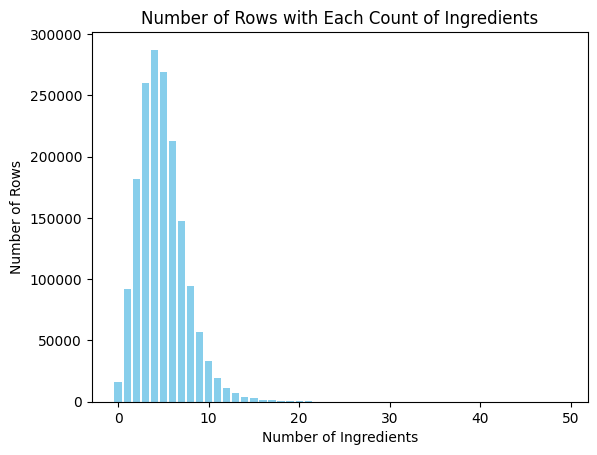

In [10]:
counts = df.group_by("NER_len").len().sort("NER_len", descending=False)
counts_filtered = counts.filter(counts["NER_len"] <= 50)
x_values = counts_filtered["NER_len"].to_numpy()
y_values = counts_filtered["len"].to_numpy()
plt.bar(x_values, y_values, color="skyblue")
plt.xlabel("Number of Ingredients")
plt.ylabel("Number of Rows")
plt.title("Number of Rows with Each Count of Ingredients")
plt.show()

In [11]:
single_ingredients = ingredient_df.filter(ingredient_df["count"] == 1)
single_ingredients

ingredient,count
str,i64
"""~two""",1
"""~t""",1
"""~salt""",1
"""~s&p""",1
"""~poultry seasoning""",1
"""~paper""",1
"""~onion""",1
"""~non-stick frying pan""",1
"""~lemon-lime""",1


In [12]:
exploded_df = df.explode("NER")
# all_ingredients_counts = exploded_df.group_by("NER").agg(pl.count("NER").alias("count"))
# all_ingredients_counts.sort("count", descending=True)
all_ingredients = exploded_df.select(pl.col("NER"))
del exploded_df
all_ingredients_unique = all_ingredients.unique()

In [13]:
image_ingredients = pl.read_parquet("unique_ingredients.parquet")
common_ingredients = []
for i, my_ingredient in enumerate(image_ingredients["ClassId"].to_list()):
    df_filtered = df.filter(df["NER"].list.contains(my_ingredient))
    if df_filtered.height > 0:
        common_ingredients.append(my_ingredient)
print("Matched Ingredients: ", len(common_ingredients))
print(common_ingredients)

Matched Ingredients:  73
['almonds', 'apple', 'asparagus', 'aubergine', 'avocado', 'banana', 'beer', 'beetroot', 'bell pepper', 'biscuits', 'broccoli', 'cabbage', 'capsicum', 'carrot', 'carrots', 'cauliflower', 'cheese', 'chicken', 'chilli pepper', 'corn', 'croissant', 'cucumber', 'dark-chocolate', 'egg', 'eggplant', 'grape', 'grapes', 'gruyere', 'jalepeno', 'juice', 'kiwi', 'leek', 'lemon', 'lettuce', 'lime', 'mandarine', 'mango', 'melon', 'milk', 'mushroom', 'nectarine', 'onion', 'orange', 'papaya', 'passion-fruit', 'peach', 'pear', 'peas', 'pickle', 'pineapple', 'plum', 'pomegranate', 'potato', 'raddish', 'red-beet', 'rice', 'salami', 'salmon', 'satsumas', 'sour-cream', 'soy beans', 'soy-milk', 'spinach', 'strawberries', 'strawberry', 'sweetcorn', 'sweetpotato', 'tea', 'tomato', 'turnip', 'watermelon', 'yoghurt', 'zucchini']


In [14]:
common_ingredients_df = pl.DataFrame(common_ingredients)
common_ingredients_df = common_ingredients_df.rename({"column_0": "ClassId"})
common_ingredients_df.write_parquet("common_ingredients.parquet")
common_ingredients_df

ClassId
str
"""almonds"""
"""apple"""
"""asparagus"""
"""aubergine"""
"""avocado"""
"""banana"""
"""beer"""
"""beetroot"""
"""bell pepper"""


In [15]:
# sample_common_ingredients = random.sample(common_ingredients, 12)
# variations = list(powerset(sample_common_ingredients))
# total_recipes_matched = 0
# for i, v in enumerate(variations):
#     match_ner_count = df.filter(pl.col("NER_len") == len(v))
#     final_df = match_ner_count.filter(
#         pl.all_horizontal(pl.lit(item).is_in(pl.col("NER")) for item in v)
#     )
#     if final_df.height > 0:
#         print(
#             f"Case:\t{i:-4d} of {len(variations):-4d}\tMatched: {final_df.height:-4d} recipes"
#         )
#         total_recipes_matched += final_df.height
#     else:
#         pass
#     # print("="*80)
# print(
#     f"Total Recipes Matched: {total_recipes_matched} for {len(variations)} variations"
# )

In [16]:
# short_list = filtered_ingredients.head(12)
# variations = list(powerset(short_list["ingredient"].to_list()))
# total_recipes_matched = 0
# for i, v in enumerate(variations):
#     match_ner_count = df.filter(pl.col("NER_len") == len(v))
#     final_df = match_ner_count.filter(
#         pl.all_horizontal(pl.lit(item).is_in(pl.col("NER")) for item in v)
#     )
#     if final_df.height > 0:
#         print(
#             f"Case:\t{i:-4d} of {len(variations):-4d}\tMatched: {final_df.height:-4d} recipes"
#         )
#         total_recipes_matched += final_df.height
#     else:
#         pass
#     # print("="*80)
# print(
#     f"Total Recipes Matched: {total_recipes_matched} for {len(variations)} variations"
# )